In [50]:
library(ggplot2)
library(bestglm)
library(VGAM)
library(ellipse)
library(leaps)
library(MASS)
library(corrplot)

Loading required package: leaps

Loading required package: stats4

Loading required package: splines


Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs


corrplot 0.84 loaded



In [6]:
Y_train <- read.csv("~/4A/Projet_4A/GestionDeProjet4A/Données/Y_train_sl9m6Jh.csv")
X_train <- read.csv("~/4A/Projet_4A/GestionDeProjet4A/Données/X_train_v2.csv")
X_test <- read.csv("~/4A/Projet_4A/GestionDeProjet4A/Données/X_test_v2.csv")
Y_test_random <- read.csv("~/4A/Projet_4A/GestionDeProjet4A/Données/Y_test_random.csv")
WindFarms<- read.table("~/4A/Projet_4A/GestionDeProjet4A/Données/WindFarms_complementary_data.csv", sep=";", quote="\"")

# Premiers tests sur set de train

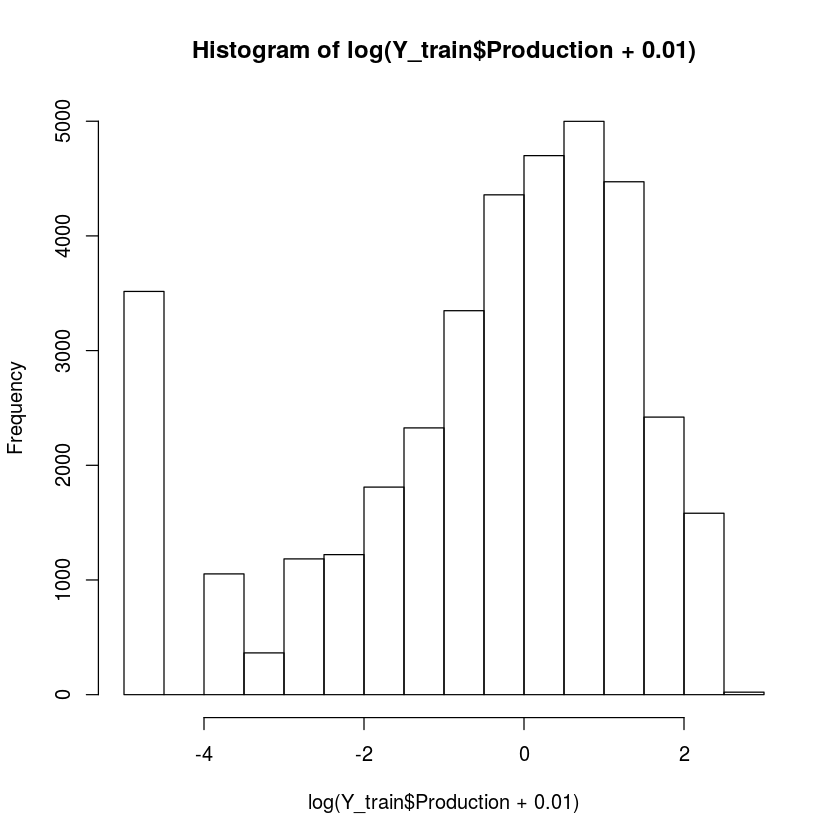

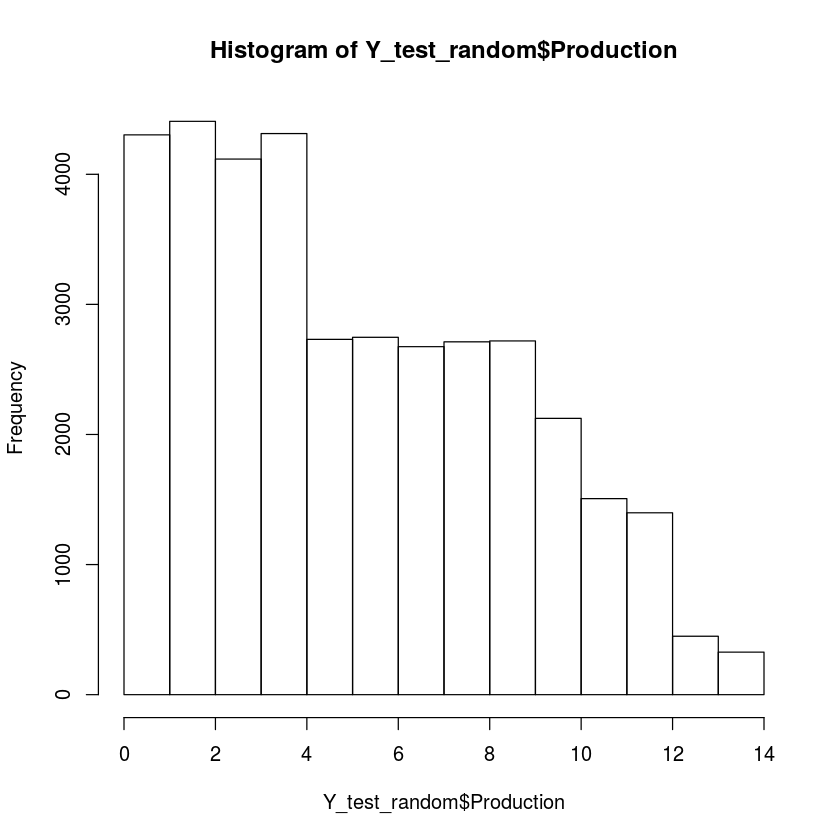

In [28]:
hist(log(Y_train$Production+0.01))
hist(Y_test_random$Production)

In [47]:
temp_D2 <- X_train[,c(12,15,18)]
mydata <- cbind(Y = Y_train$Production, temp_D2)
names(mydata) <- c("Y", "X12", "X15", "X18")
subset <- 48:148
sum(mydata[subset, ])
model2 <- lm(log(Y+0.01) ~ ., data = mydata[subset, ])
summary(model2)


[1] 88481.97


Call:
lm(formula = log(Y + 0.01) ~ ., data = mydata[subset, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2843 -2.4791  0.3882  2.0965  3.9605 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.81418   42.87849  -0.159 0.874064    
X12          1.05738    0.30457   3.472 0.000774 ***
X15         -1.13649    0.30004  -3.788 0.000264 ***
X18          0.09908    0.34692   0.286 0.775795    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.425 on 97 degrees of freedom
Multiple R-squared:  0.173,	Adjusted R-squared:  0.1475 
F-statistic: 6.766 on 3 and 97 DF,  p-value: 0.000343


In [49]:
temp_D3 <- X_train[,c(24,27,30)]
data3 <- cbind(Y = Y_train$Production, temp_D3)
names(data3) <- c("Y", "X12", "X15", "X18")
subset3 <- 48:2423
data3 <- data3[subset3, ]
model3 <- lm(log(Y+0.01) ~ ., data = data3)
summary(model3)


Call:
lm(formula = log(Y + 0.01) ~ ., data = data3)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6733 -2.4398  0.3476  2.0785  4.0595 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15.85868    3.50160  -4.529 6.22e-06 ***
X12          -0.03300    0.07270  -0.454     0.65    
X15          -0.44357    0.09196  -4.824 1.50e-06 ***
X18           0.52631    0.07373   7.138 1.26e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.342 on 2348 degrees of freedom
  (24 observations deleted due to missingness)
Multiple R-squared:  0.02828,	Adjusted R-squared:  0.02703 
F-statistic: 22.77 on 3 and 2348 DF,  p-value: 1.567e-14


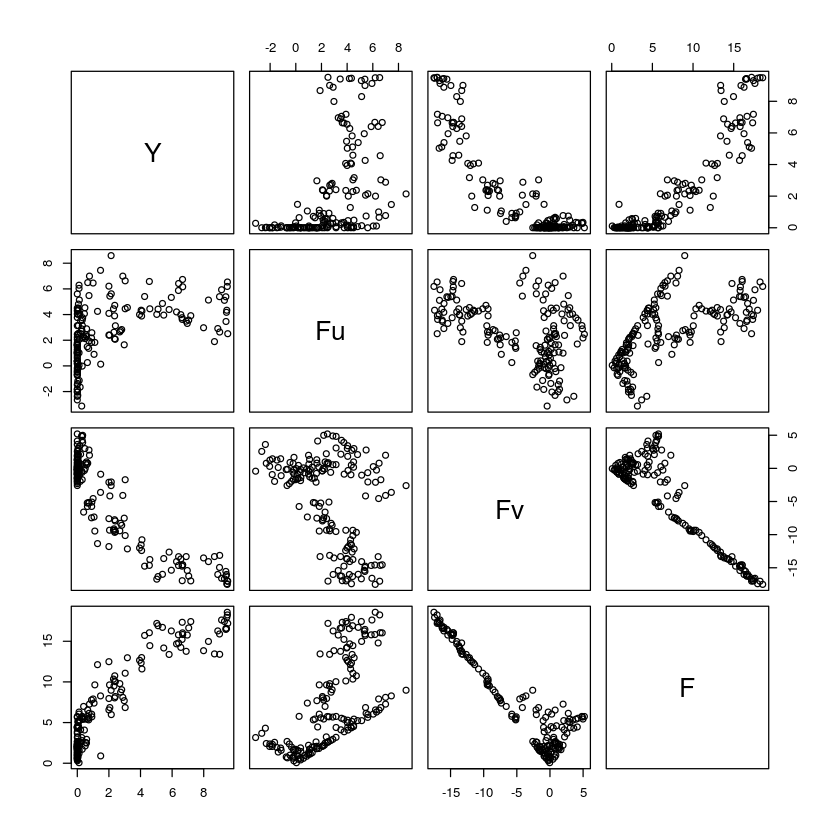

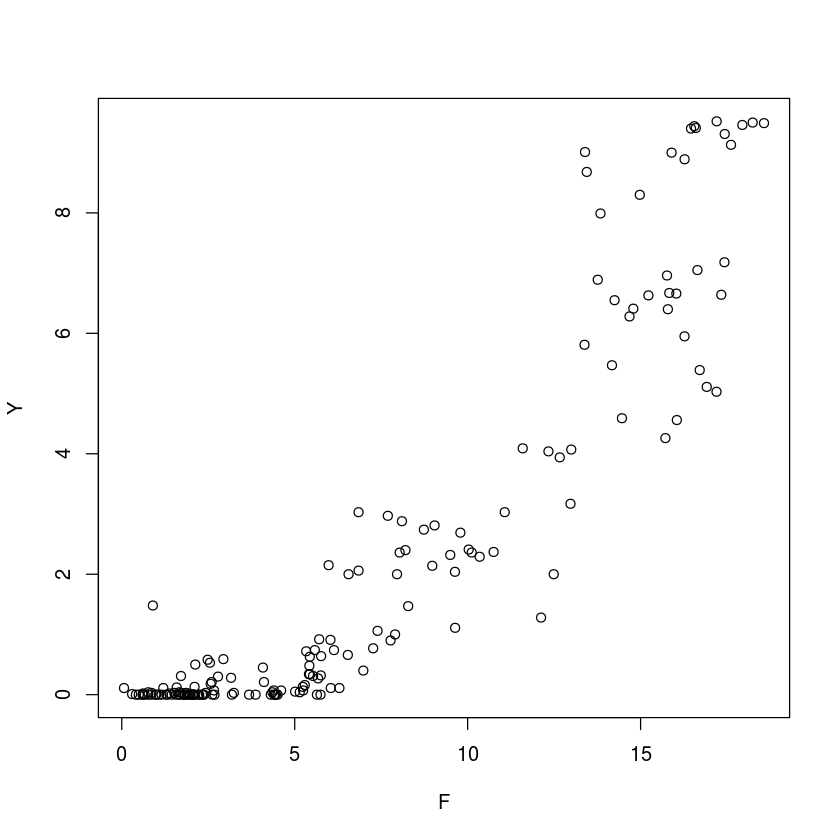


Call:
lm(formula = Y ~ I(F^3) - 1, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6797 -0.0463  0.0172  0.5034  4.8941 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
I(F^3) 1.713e-03  4.174e-05   41.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.101 on 167 degrees of freedom
Multiple R-squared:  0.9098,	Adjusted R-squared:  0.9093 
F-statistic:  1685 on 1 and 167 DF,  p-value: < 2.2e-16


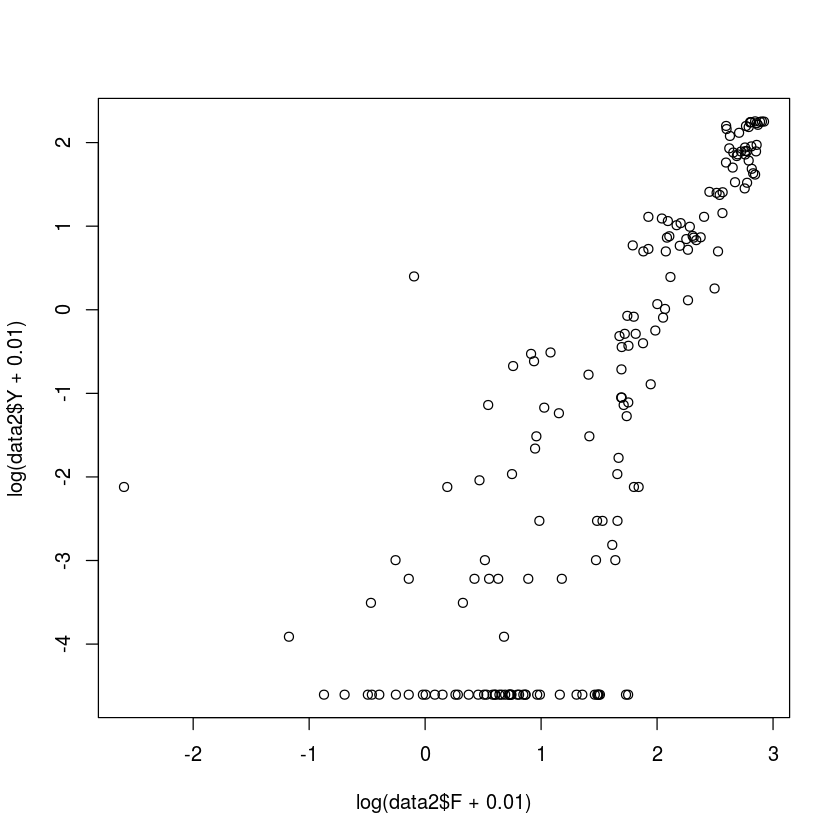

In [59]:
data2 <- cbind(Y = Y_train$Production, X_train[ ,c(19,20)])
names(data2) <- c("Y", "Fu", "Fv")
data2$F <- sqrt(data2$Fu^2+data2$Fv^2)
subset <- 25:192
data2 <- data2[subset, ]
pairs(data2)
with(data = data2, plot(Y ~ F))
plot(log(data2$Y+0.01) ~ log(data2$F+0.01))
summary(lm(Y~I(F^3)-1, data = data2))

In [12]:
str(temp_D2)

'data.frame':	37375 obs. of  5 variables:
 $ NWP1_00h_D.2_T: num  NA NA NA NA NA NA NA NA NA NA ...
 $ NWP1_06h_D.2_T: num  NA NA NA NA NA NA NA NA NA NA ...
 $ NWP1_12h_D.2_T: num  NA NA NA NA NA NA NA NA NA NA ...
 $ NWP1_18h_D.2_T: num  NA NA NA NA NA NA NA NA NA NA ...
 $ NWP1_00h_D.1_T: num  NA NA NA NA NA NA NA NA NA NA ...


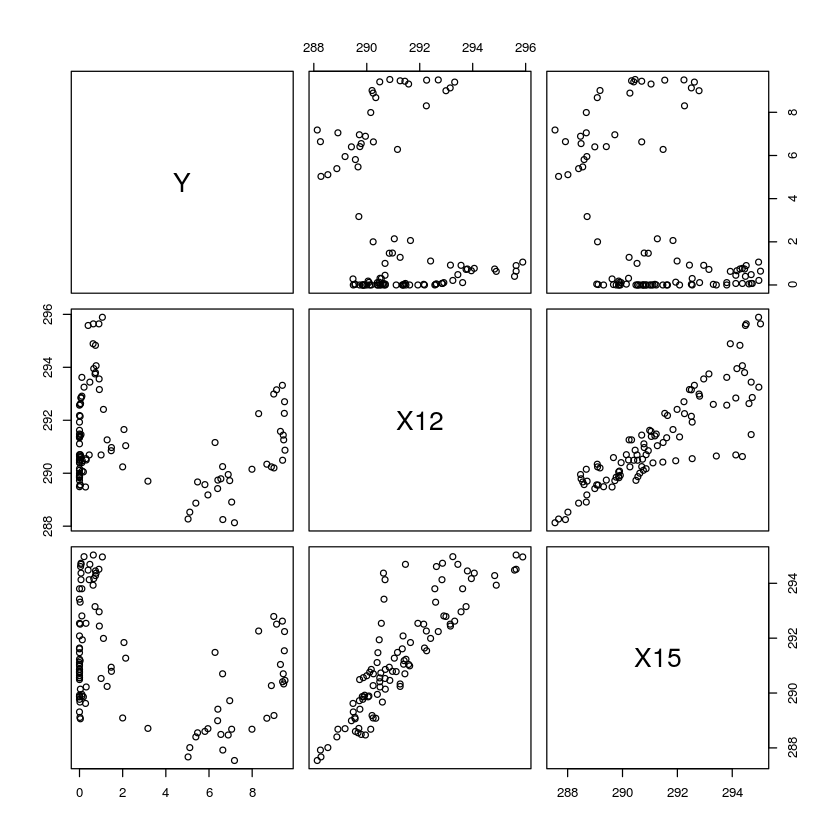

In [25]:
pairs(mydata[subset, ])

# Passage au set de test WF2

set de données utilisées : première semaine de WF2 (lignes 6192 → 6359)

In [66]:
data_all = cbind(Y = Y_train$Production, X_train[ ,c(16,17,18)])
names(data_all) <- c("Y", "U", "V", "T")
data_all$F <- sqrt(data_all$U^2 + data_all$V^2)
subset_week <- 6192:6359
data_week <- data_all[subset_week, ]
subset_month <- 6192:6934
data_month <- data_all[subset_month, ]

## Utilisation Force du vent

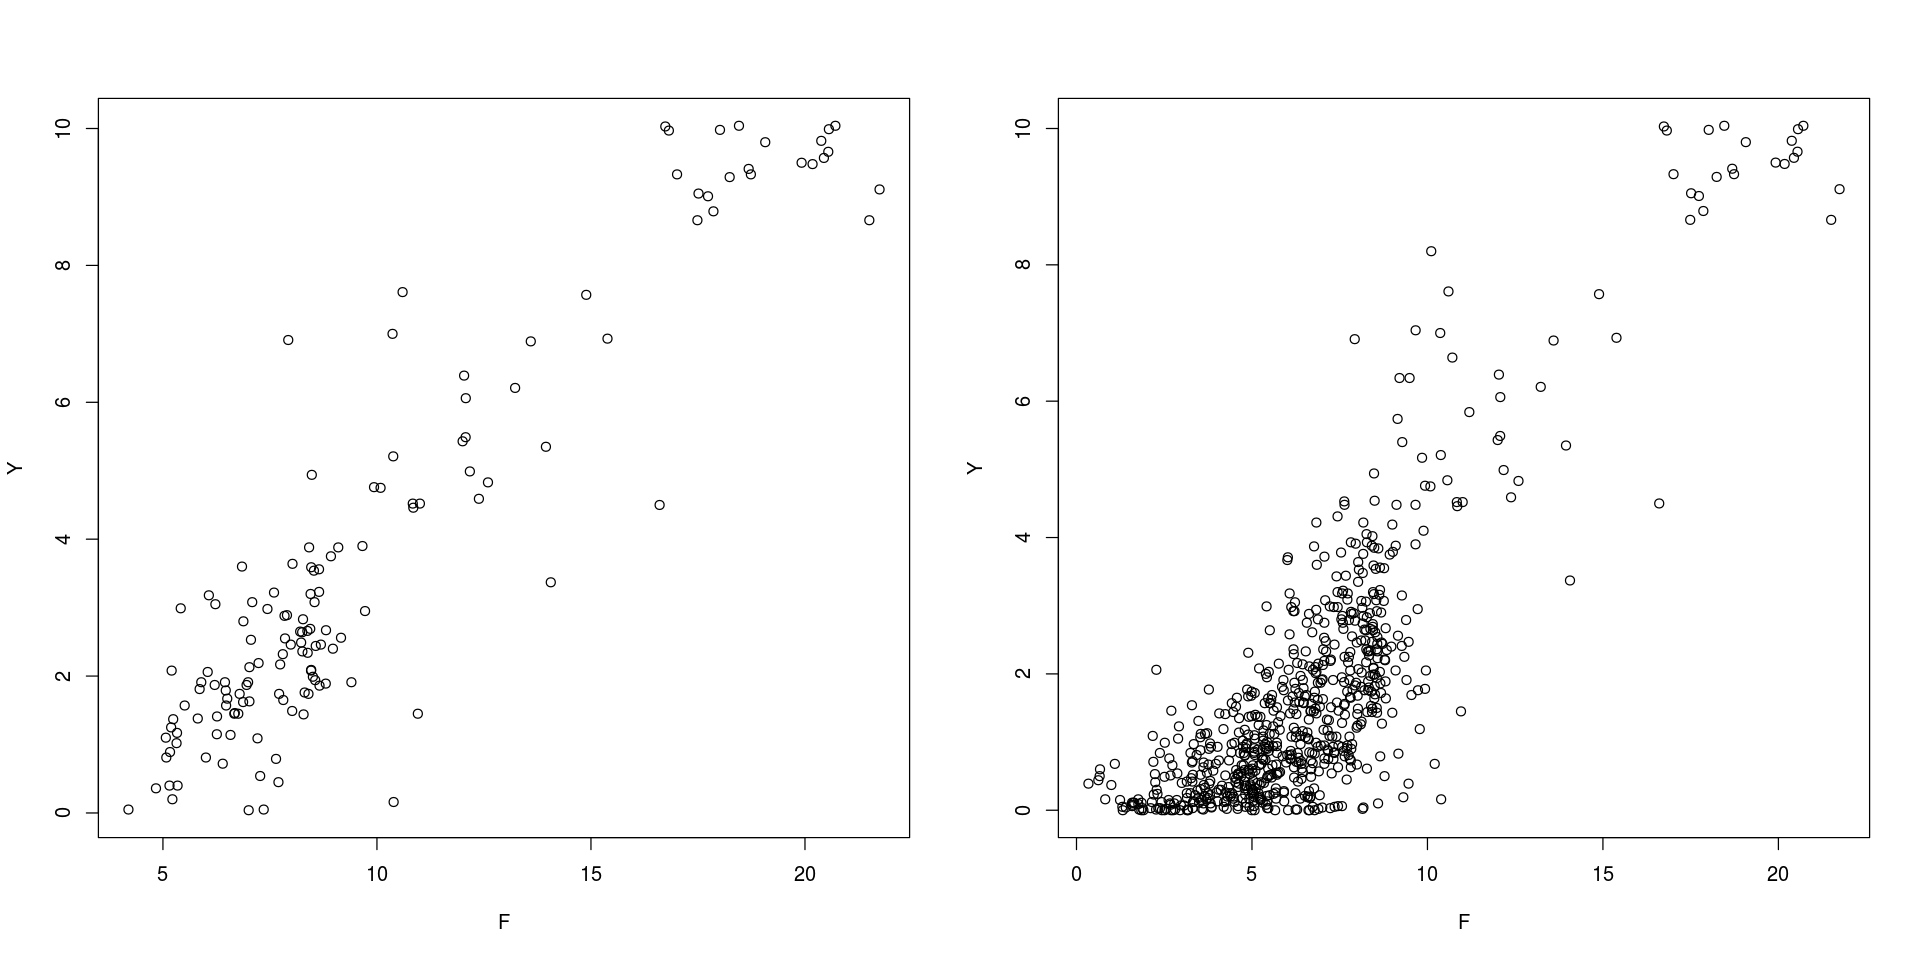

In [80]:
options(repr.plot.width=16, repr.plot.height=8)
par(mfrow=c(1,2))
with(data = data_week, plot(Y ~ F))
with(data = data_month, plot(Y ~ F))

In [67]:
#summary(lm(Y~F, data = data_week))
summary(lm(Y~F-1, data = data_week))
#summary(lm(Y~I(F^3)-1, data = data_week))
#summary(lm(Y~I(F^3)-1, data = data_week))


Call:
lm(formula = Y ~ F - 1, data = data_week)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1485 -1.2961 -0.7062  0.4840  3.6225 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
F  0.41468    0.01111   37.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.451 on 144 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.9063,	Adjusted R-squared:  0.9057 
F-statistic:  1393 on 1 and 144 DF,  p-value: < 2.2e-16


In [69]:
#summary(lm(Y~F, data = data_month))
summary(lm(Y~F-1, data = data_month))
#summary(lm(Y~I(F^3)-1, data = data_month))
#summary(lm(Y~I(F^3)-1, data = data_month))


Call:
lm(formula = Y ~ F - 1, data = data_month)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0915 -1.1175 -0.6020  0.0995  5.0368 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
F 0.312946   0.006537   47.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.293 on 719 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.7612,	Adjusted R-squared:  0.7609 
F-statistic:  2292 on 1 and 719 DF,  p-value: < 2.2e-16


## Utilisation Température

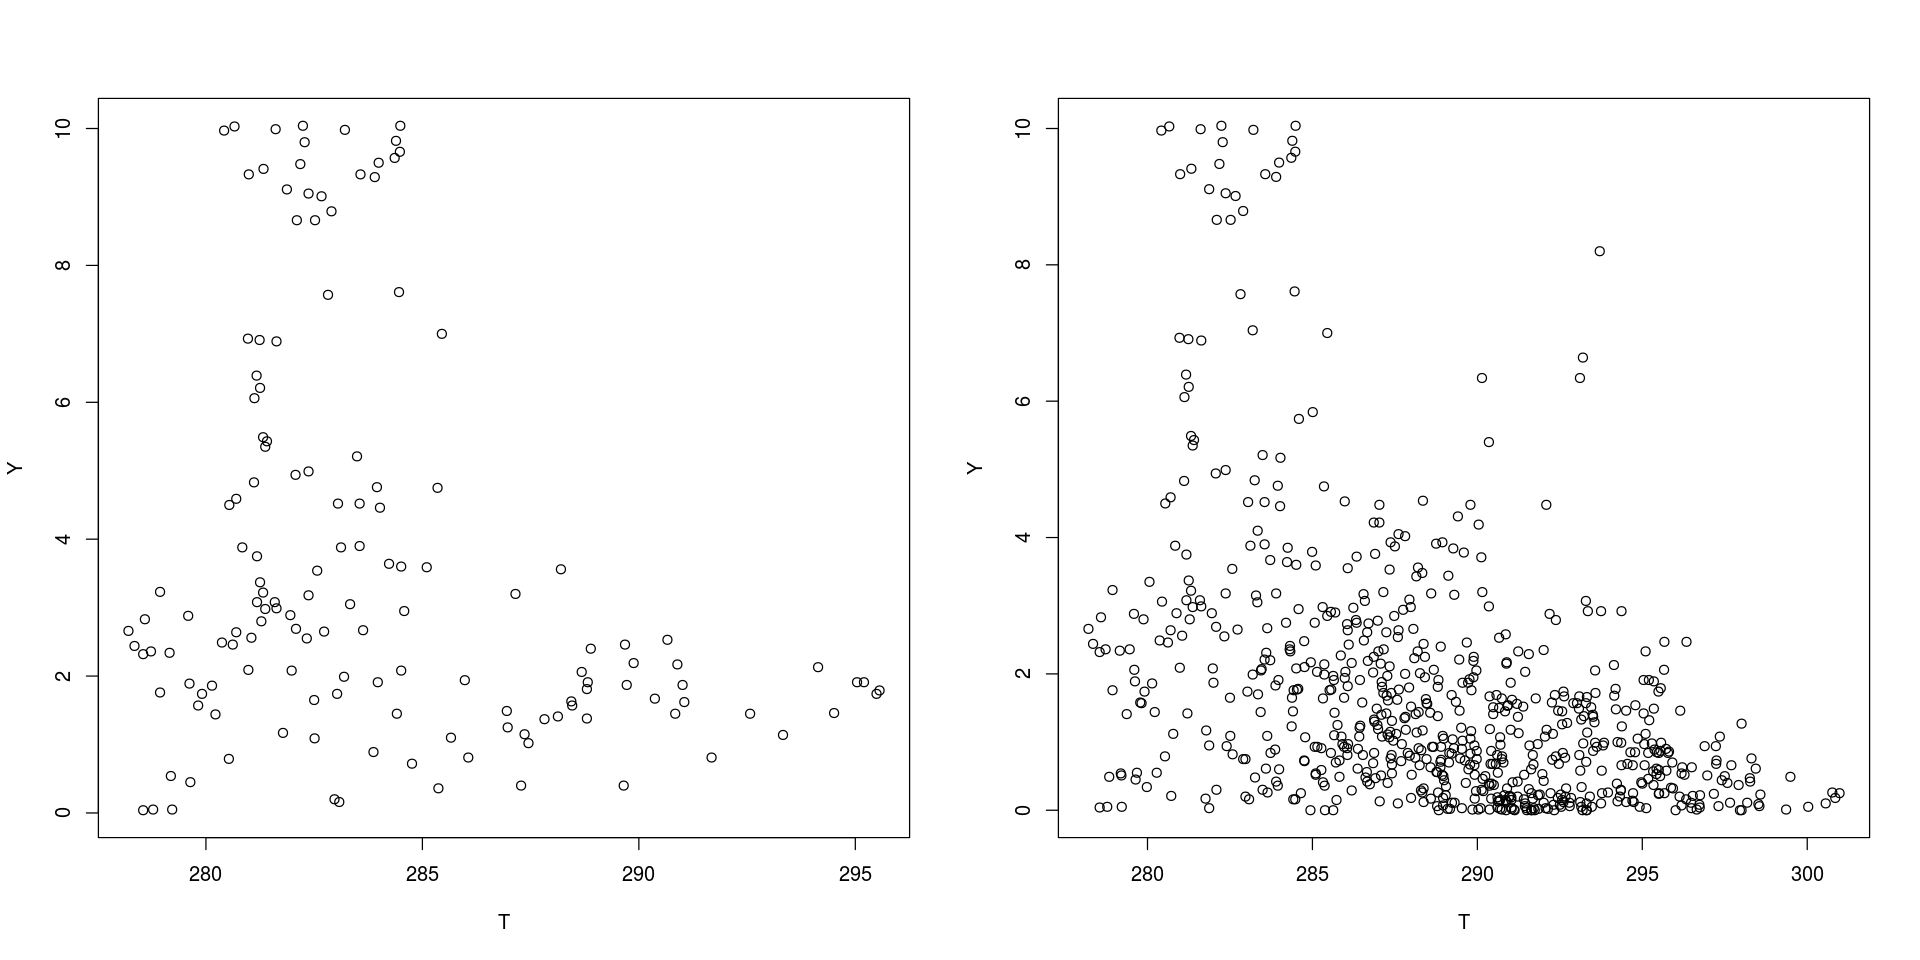

In [81]:
options(repr.plot.width=16, repr.plot.height=8)
par(mfrow=c(1,2))
with(data = data_week, plot(Y ~ T))
with(data = data_month, plot(Y ~ T))

Pas de lien à priori

In [88]:
data_all = cbind(Y = Y_train$Production, X_train[ ,c(16,17,18)])
names(data_all) <- c("Y", "U", "V", "T")
subset_week <- 6192:6359
data_week <- data_all[subset_week, ]
data_week$GT <- (data_week$T - data_all[subset_week-6, ]$T)/data_week$T
subset_month <- 6192:6934
data_month <- data_all[subset_month, ]

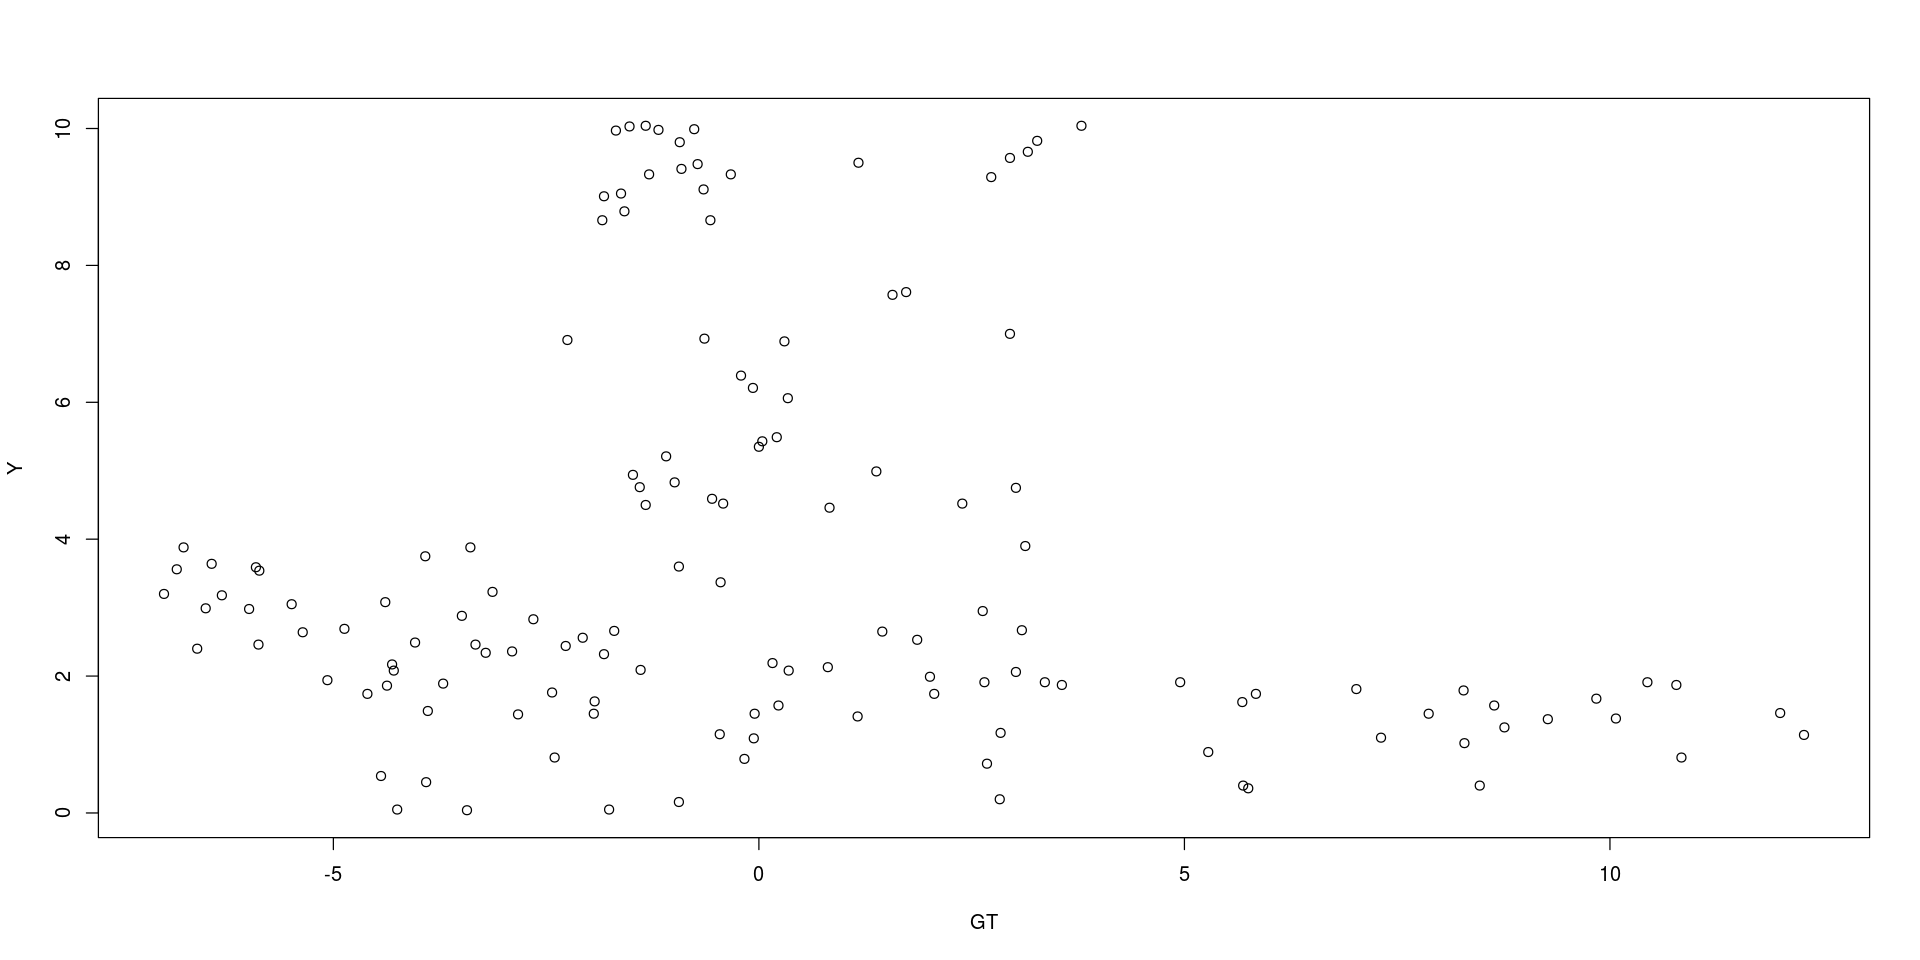

In [87]:
with(data = data_week, plot(Y ~ GT))

In [91]:
for (i in 1:24) {
   data_week$GT <- data_week$GT + (data_week$T - data_all[subset_week-i, ]$T)/data_week$T}

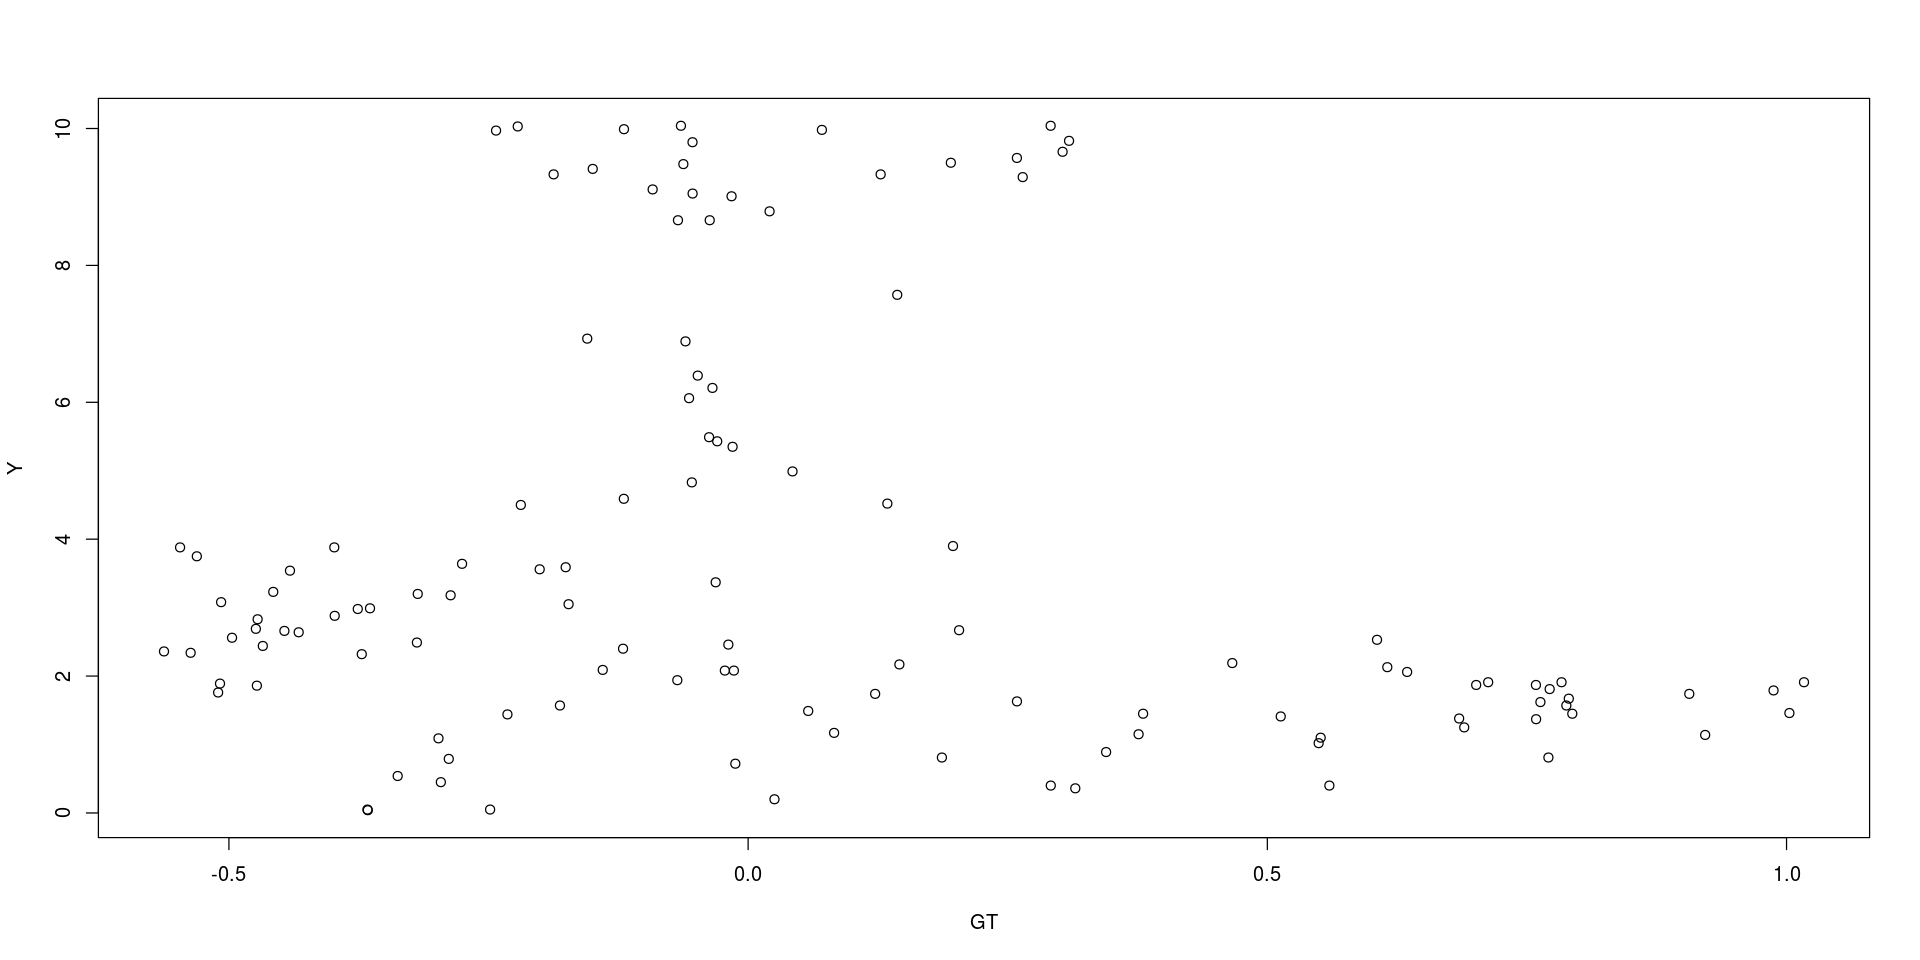

In [92]:
with(data = data_week, plot(Y ~ GT))

In [105]:
data_month$GT <- (data_month$T - data_all[subset_month-1, ]$T)/data_month$T
for (i in 2:24) {
   data_month$GT <- data_month$GT + (data_month$T - data_all[subset_month-i, ]$T)/data_month$T}

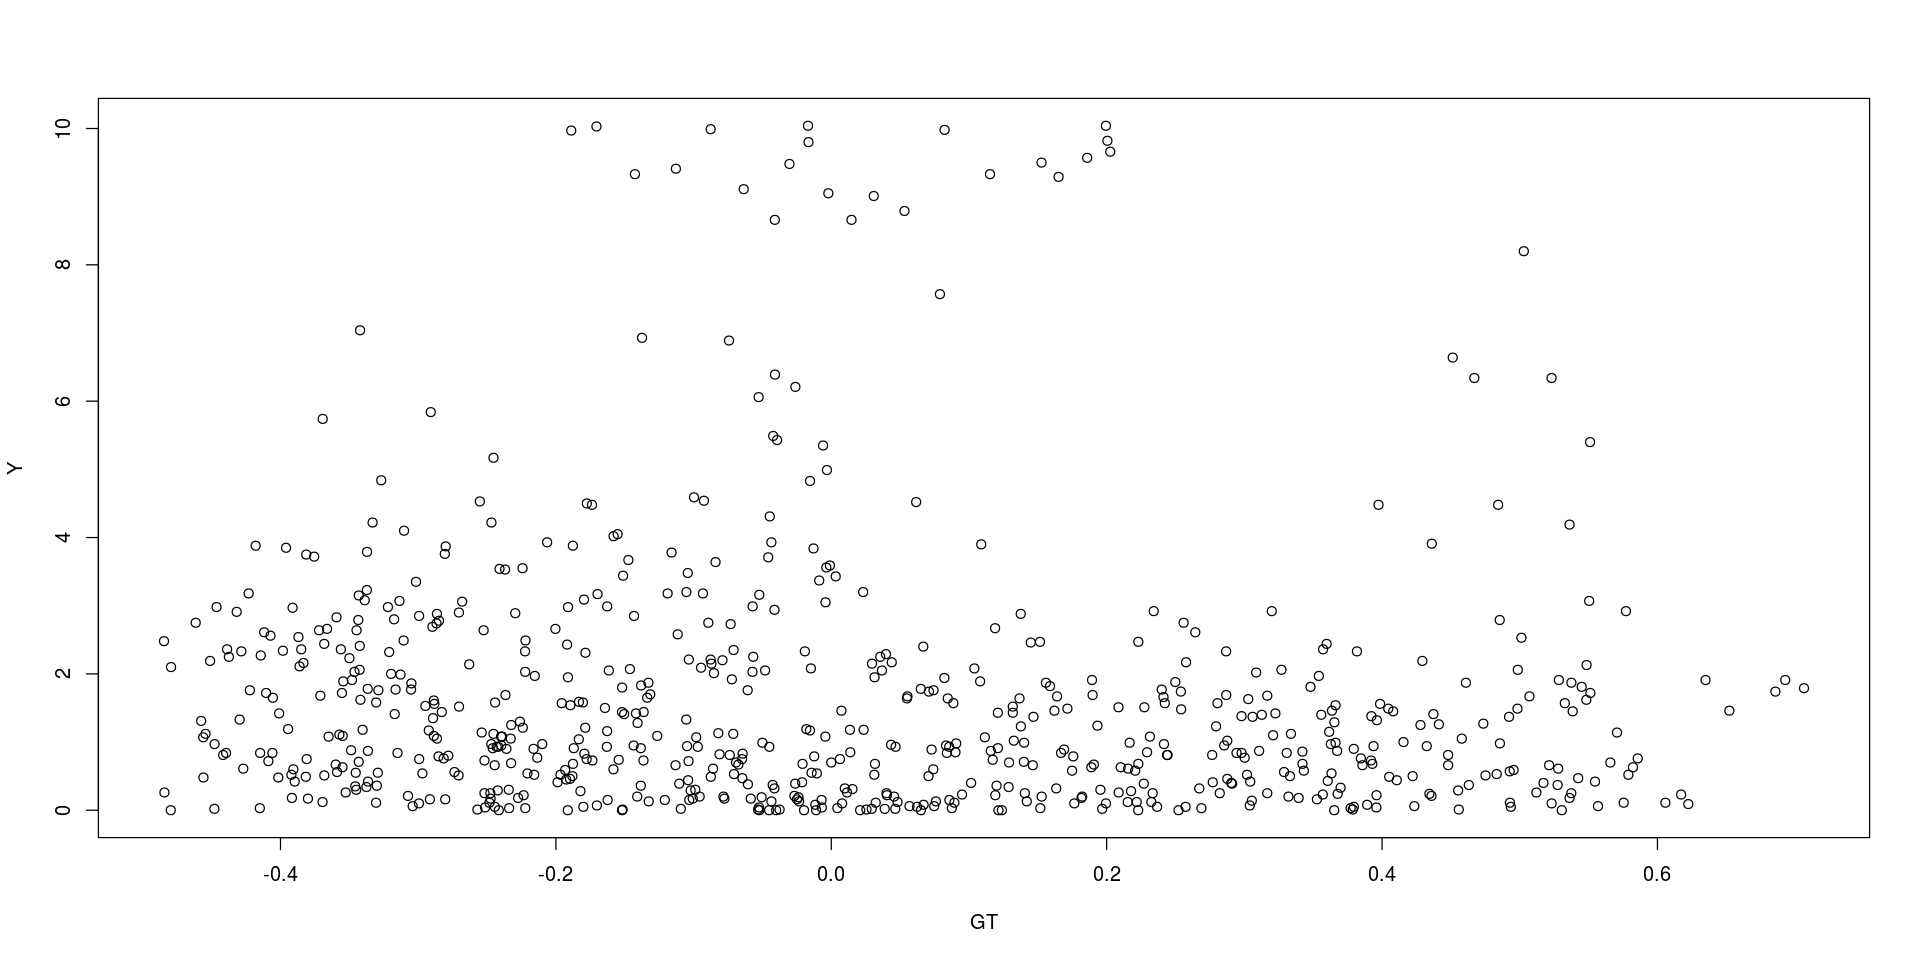

In [106]:
with(data = data_month, plot(Y ~ GT))

## Utilisation Couverture nuageuse

In [108]:
96

[1] 96

In [122]:
data_N = cbind(Y = Y_train$Production, X_train[ ,96])
names(data_N) <- c("Y", "N")
data_N$NN <- (data_N$N)^2
subset_week <- 6192:6359
data_week <- data_N[subset_week, ]
#data_week$GT <- (data_week$T - data_all[subset_week-6, ]$T)/data_week$T
subset_month <- 6192:6934
data_month <- data_N[subset_month, ]

ERROR: Error in data_N$N: $ operator is invalid for atomic vectors


ERROR: Error in eval(predvars, data, env): objet 'NN' introuvable


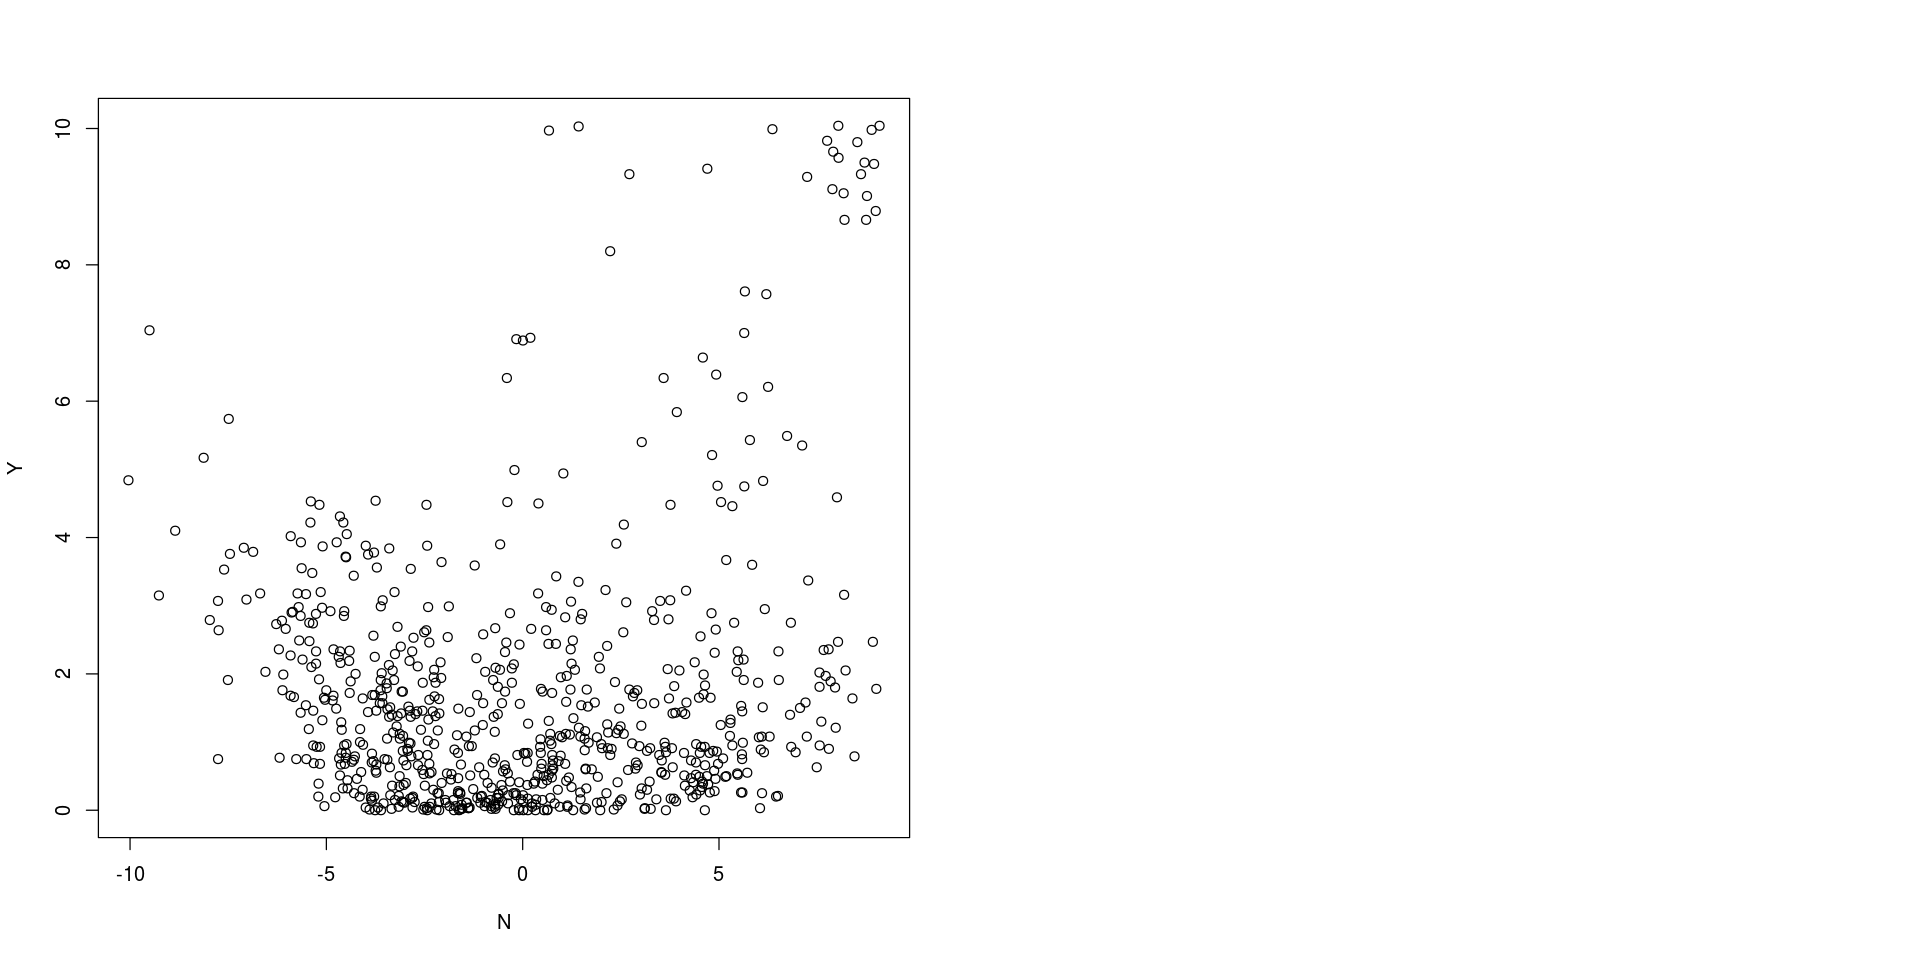

In [116]:
options(repr.plot.width=16, repr.plot.height=8)
par(mfrow=c(1,2))
with(data = data_month, plot(Y ~ N))
with(data = data_month, plot(Y ~ NN))